<a href="https://colab.research.google.com/github/mahesh-keswani/ML-DL-Basics/blob/main/CustomizingVariousPartsOfNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Reference for this notebook: https://www.youtube.com/watch?v=BrLnT9xIMpk
import tensorflow as tf

In [2]:
# 10 neurons in first hidden layer and input is 5 dimensional
layer = tf.keras.layers.Dense( 10, input_shape = (None, 5) )

In [3]:
# See it's dimensions is also 5
data = tf.random.normal( shape = [100, 5] )

In [4]:
# passing data to layer and inspecting output
layer(data).shape

TensorShape([100, 10])

In [5]:
# shape [100, 10], because for each sample, we have 10 outputs (1, 10)
# since we have 100 such samples, therefore (100, 10)

In [6]:
# visualzing actual outputs
layer(data)

<tf.Tensor: shape=(100, 10), dtype=float32, numpy=
array([[ 9.44141865e-01,  3.84595573e-01, -2.15217337e-01,
         4.62555587e-01, -1.32761598e+00,  4.36611116e-01,
         4.69698042e-01,  1.44080770e+00, -4.96504307e-01,
         7.83664405e-01],
       [ 2.49187335e-01, -2.04450905e-01, -5.86410820e-01,
         1.26681268e+00, -9.15032387e-01,  7.58692563e-01,
        -8.48555386e-01,  5.00358224e-01,  3.14704806e-01,
        -4.41636950e-01],
       [-5.27957320e-01,  5.67331135e-01, -3.37770998e-01,
         3.82530212e-01, -4.16465342e-01,  6.05689764e-01,
        -2.27216795e-01,  4.97080199e-02, -9.08093154e-01,
         3.74954879e-01],
       [-5.08917749e-01,  9.12585855e-01, -9.84953165e-01,
         2.82581061e-01, -6.03920281e-01,  1.08483927e-02,
         2.24435821e-01,  3.74780536e-01, -5.28241217e-01,
         4.99878824e-01],
       [ 3.30542654e-01,  5.06523907e-01, -2.50001520e-01,
         1.65218130e-01, -6.98958993e-01,  2.12942705e-01,
         4.53120917

In [7]:
# you can check all the weights and biases by
# it will return weights and biases both together
layer.variables

[<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.45318276, -0.3177352 ,  0.49097973, -0.5917401 ,  0.5886813 ,
         -0.5416206 ,  0.5386624 , -0.05979079,  0.28491294,  0.0694806 ],
        [-0.0248965 , -0.15045092, -0.5292889 ,  0.32347727,  0.5199668 ,
         -0.3572982 ,  0.01255935, -0.19581267,  0.44683248, -0.2711786 ],
        [-0.527694  ,  0.03524196,  0.00790632, -0.61443925,  0.25092173,
         -0.556788  , -0.03754425, -0.51667523,  0.5616873 , -0.37242085],
        [-0.47117674,  0.4156379 , -0.21600968, -0.3866499 ,  0.16979188,
         -0.3281386 ,  0.27671194, -0.21208328, -0.19216827,  0.20505834],
        [-0.02826077,  0.3876266 , -0.5899588 ,  0.3286178 , -0.47873896,
          0.03587276,  0.10512704,  0.4107762 , -0.12284899,  0.22195244]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [8]:
# inorder to access them seperately 
# For accessing only weights
print(layer.kernel)

# For accessing only biases
print(layer.bias)

<tf.Variable 'dense/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[ 0.45318276, -0.3177352 ,  0.49097973, -0.5917401 ,  0.5886813 ,
        -0.5416206 ,  0.5386624 , -0.05979079,  0.28491294,  0.0694806 ],
       [-0.0248965 , -0.15045092, -0.5292889 ,  0.32347727,  0.5199668 ,
        -0.3572982 ,  0.01255935, -0.19581267,  0.44683248, -0.2711786 ],
       [-0.527694  ,  0.03524196,  0.00790632, -0.61443925,  0.25092173,
        -0.556788  , -0.03754425, -0.51667523,  0.5616873 , -0.37242085],
       [-0.47117674,  0.4156379 , -0.21600968, -0.3866499 ,  0.16979188,
        -0.3281386 ,  0.27671194, -0.21208328, -0.19216827,  0.20505834],
       [-0.02826077,  0.3876266 , -0.5899588 ,  0.3286178 , -0.47873896,
         0.03587276,  0.10512704,  0.4107762 , -0.12284899,  0.22195244]],
      dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>


<h1>Creating custom layer</h1>
<p>
For this we have to implement 3 functions<br />
__init__ : where we can do all input independent initialization<br />
build: where you know the shape of input tensors and can do the rest of the initialization <br />
call: where you do the forward propagation



In [9]:
# This is basically doing the same function as dense layer
class MyDense(tf.keras.layers.Layer):
    def __init__(self, n_output_neurons):
        super(MyDense, self).__init__()
        # number of output neurons
        self.n_output_neurons = n_output_neurons
    
    def build(self, input_shape):
        #  say previous layer has 10 output neurons, so for this layer shape of weight will be(10, number_of_neurons_we_want_in_this_layer)                                                        
        self.my_weight = self.add_weight(name = "my_weights", shape = [ int(input_shape[-1]), self.n_output_neurons ])
    
    # Doing forward propagation
    def call(self, input_to_this_layer):
        return tf.matmul( input_to_this_layer, self.my_weight )

In [10]:

layer = MyDense(n_output_neurons = 10)

input_to_layer = tf.random.normal( shape = [100, 5] )

# so network is like this: 5(input_layer) -> 10(output_layer)

In [11]:
# when this cell will run it will call first build, initialize weights and then call "call" function for forward propagtion
# and this will return the result of forward propagtion 

# so the expected output shape should be (100, 10)
layer( input_to_layer ).shape

TensorShape([100, 10])

In [12]:
# visualizing actual output
layer( input_to_layer )

<tf.Tensor: shape=(100, 10), dtype=float32, numpy=
array([[-2.11167529e-01, -5.71288288e-01,  5.52037179e-01,
         7.63047397e-01,  1.58505097e-01,  1.68673784e-01,
         7.71802757e-03,  5.73827028e-01, -2.62843743e-02,
        -9.99361634e-01],
       [-7.70278931e-01, -1.82795274e+00,  3.15316767e-01,
         6.71330929e-01,  1.34975165e-01,  4.72845286e-01,
         3.63358289e-01,  6.80530310e-01, -1.18247271e-01,
        -3.95676255e-01],
       [ 5.17209888e-01, -1.14832997e+00, -8.15485179e-01,
        -2.86661416e-01,  8.03774059e-01,  1.50734723e+00,
        -3.71736646e-01, -4.00895596e-01, -6.32997036e-01,
         7.19904065e-01],
       [-1.66058159e+00, -1.34898555e+00,  1.57767922e-01,
         9.87462625e-02, -5.97044766e-01, -1.20272994e-01,
         2.92845190e-01,  1.11243062e-01, -1.37752369e-01,
         3.58721502e-02],
       [-6.57233059e-01, -2.58922005e+00, -1.31513491e-01,
         8.01719308e-01,  6.50255740e-01,  1.78657389e+00,
        -4.10041392

In [13]:
# For checking variables ( both weights and biases )
layer.variables

[<tf.Variable 'my_dense/my_weights:0' shape=(5, 10) dtype=float32, numpy=
 array([[ 0.52391654, -0.25796464, -0.22528064,  0.03928751,  0.35215944,
          0.39367622,  0.0086562 ,  0.12460762, -0.05776763,  0.26124972],
        [-0.50437343, -0.5333213 ,  0.3162092 ,  0.1429193 , -0.09027791,
         -0.163515  ,  0.3470922 ,  0.18251777,  0.1435107 , -0.22611919],
        [-0.13928545,  0.33743852, -0.19923845, -0.29398847, -0.38529992,
         -0.4647231 ,  0.1531148 , -0.06397909,  0.15149546,  0.58126384],
        [-0.40932196, -0.31256375, -0.08136809,  0.4036519 , -0.32265046,
          0.05656946, -0.26503682,  0.37204272, -0.23922804, -0.08239841],
        [ 0.1434958 ,  0.4213503 ,  0.26801068,  0.3211447 , -0.176792  ,
         -0.46102107,  0.10322738,  0.41539866,  0.23688024, -0.28712803]],
       dtype=float32)>]

In [14]:
# inorder to access them seperately 
# For accessing only weights, keras by default names the weight variable as kernel, but in this example we have named weight variable as my_weight
print(layer.my_weight)

# by default keras creates the bias for the layer, but we have not added it in out layer, therefore 
# print( layer.bias ) will result in error

<tf.Variable 'my_dense/my_weights:0' shape=(5, 10) dtype=float32, numpy=
array([[ 0.52391654, -0.25796464, -0.22528064,  0.03928751,  0.35215944,
         0.39367622,  0.0086562 ,  0.12460762, -0.05776763,  0.26124972],
       [-0.50437343, -0.5333213 ,  0.3162092 ,  0.1429193 , -0.09027791,
        -0.163515  ,  0.3470922 ,  0.18251777,  0.1435107 , -0.22611919],
       [-0.13928545,  0.33743852, -0.19923845, -0.29398847, -0.38529992,
        -0.4647231 ,  0.1531148 , -0.06397909,  0.15149546,  0.58126384],
       [-0.40932196, -0.31256375, -0.08136809,  0.4036519 , -0.32265046,
         0.05656946, -0.26503682,  0.37204272, -0.23922804, -0.08239841],
       [ 0.1434958 ,  0.4213503 ,  0.26801068,  0.3211447 , -0.176792  ,
        -0.46102107,  0.10322738,  0.41539866,  0.23688024, -0.28712803]],
      dtype=float32)>


<h3> It will be more favourable if we can define out custom training loop</h3>
<p> Therefore tensorflow provides tf.GradientTape API for automatic differentiation ( computing the gradient of computation w.r.t its input variables) <br />

Tensorflow records all operations executed inside the context of tf.GradientTape on to a "tape".<br />
Tensorflow then uses that tape and the gradients associated with each recorded operation to compute the gradient of recorded computation using reverse mode differentiation.

In [15]:
# For example shown here we will construct a computation graph and workout the derivates
# We compare the manually calculate derivatives with automatic differentiation
# Any computation in a tape is recorded

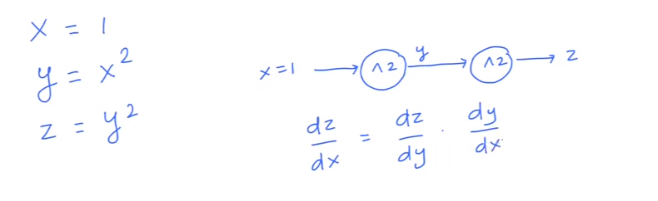

In [16]:
x = tf.Variable(1.0)
with tf.GradientTape() as tape:
    y = x**2
    z = y**2
    # therefore dz_dx = 2(y).2(x), since y = x^2, therefore, dz_dx = 2(x^2).2(x) -> 4(x^3), when x = 1.0, dz_dx = 4
    # dz_dy = 2(y), since y = x^2, therefore, dz_dy = 2(x^2), when x = 1.0, dz_dy = 2

#              i.e calculate gradient of z w.r.t x and y
dz_dx, dz_dy = tape.gradient( z, [x, y] )

In [17]:
print(dz_dx.numpy())
print(dz_dy.numpy())

4.0
2.0


In [18]:
# What is x is not a tensor variable, it is contant? Then you have to explicitly watch (keep track) them
x = tf.constant(1.0)
with tf.GradientTape() as tape:
    tape.watch(x) # Since x is not a variable, we must "watch" it
    y = x**2

dy_dx = tape.gradient(y, x) # dy_dx = 2x, for x = 1, dy_dx = 2
print(dy_dx.numpy())

2.0


In [19]:
'''
    By default, the resources held by the GradientTape are released as soon as GradientTape.gradient() method is called.
    So to compute the multiple gradients over the same computation, create the persistent gradient tape. This allows multiple calls to the
    gradient() method as the resources are released when the tape object is garbage collected 
'''

'\n    By default, the resources held by the GradientTape are released as soon as GradientTape.gradient() method is called.\n    So to compute the multiple gradients over the same computation, create the persistent gradient tape. This allows multiple calls to the\n    gradient() method as the resources are released when the tape object is garbage collected \n'

In [20]:
x = tf.Variable(1.0)
# performing forward computation with persistent=True
with tf.GradientTape(persistent=True) as tape:
    y = x**2
    z = y**2
    # therefore dz_dx = 2(y).2(x), since y = x^2, therefore, dz_dx = 2(x^2).2(x) -> 4(x^3), when x = 1.0, dz_dx = 4
    # dz_dy = 2(y), since y = x^2, therefore, dz_dy = 2(x^2), when x = 1.0, dz_dy = 2

#              i.e calculate gradient of z w.r.t x
dz_dx = tape.gradient( z, x )
# i.e calculate gradient of z w.r.t x
dz_dy = tape.gradient(z, y)

# droop the reference of the tape
del tape

In [21]:
print(dz_dx.numpy())
print(dz_dy.numpy())

4.0
2.0


<h1> Recording control Flow </h1>
<p> Because the tapes record the operation as they are executed, python control flows like ifs and while are also naturally handled</p>

In [23]:
def f(x, y):
    output = 1.0
    for i in range(y):
        if i > 1 and i < 5:
            # For i = 2 to 4 (i.e 3 times) , multiply output=1.0 with x 
            output = tf.multiply(output, x)
    # therefore, output = x * x * x -> x^3, therefore, d(output)_dx = 3x^2 
    return output

def grad(x, y):
    with tf.GradientTape() as tape:
        # watching x
        tape.watch(x)

        # performing forward propagtion using python function f
        out = f(x, y)
    return tape.gradient(out, x)

x = tf.constant(2.0)
print( grad(x, 6).numpy() ) # output will get multipled by x 3 times, Expected output-> 8 
print( grad(x, 4).numpy() ) # output will get multipled by x 2 times, Expected output-> 4

12.0
4.0


<h1>Higher order gradients</h1>
<p> Operations inside the GradientTape context manager are recorded for automatic differentiation. If the gradients are computed in that context, gradient computations are recorded as well. As a result the same exact API can be used for higher order gradients </p>

In [24]:
x = tf.Variable(1.0)

with tf.GradientTape() as tape1:
    with tf.GradientTape() as tape2:
        y = x * x * x
    
    # compute the gradient inside the tape2 context manager
    dy_dx = tape2.gradient(y, x) # Expected output -> dy_dx = 3x^2, at x = 1, dy_dx = 3

# Now calculating derivative of dy_dx w.r.t x, which means second order derivative of y w.r.t x
d2y_dx2 = tape1.gradient( dy_dx, x ) # d2y_dx2 = 6x, therefore at x = 1, d2y_dx2 = 6

print( dy_dx.numpy() )
print( d2y_dx2.numpy() )

3.0
6.0


So far, we covered the gradient computation in tensorflow, with that we have enough of the primitives to build and train neural networks.<br />
<h1> Custom Training </h1><br />
Let's train the neural network from the first principle so as to acquire the strong foundational understanding of the concepts. We use tf.Variable to represent the weights in the model. There are operations tf.assign_sub, tf.scatter_update that manipulate the value stored in the tensorflow variable 

In [25]:
x = tf.Variable(3.0)
# use the python assert as the debugging statement to test the condition
assert x.numpy() == 3.0

# Reassign the value
x.assign(5.0)
# use the python assert as the debugging statement to test the condition
assert x.numpy() == 5.0


<h1>Fit the linear model</h1><br />
Lets use the concept of Tensor, Variable and GradientTape to build the simple linear model. <br />
This typically involves the few steps: <br />
1) Define the model <br />
2) Define the loss function <br />
3) Obtain the training data <br />
4) Run through the training data and start training <br />

Here we will create the simple model, f(x) = x * W + b, which contains two variables W and b, and we will synthesize the data using W = 3.0 and b = 2.0

<h1>Define the model</h1>

In [26]:
class Model(object):

    # initialize the parameters to some value, can also use different ways to initialize
    def __init__(self, W = 5.0, b = 0.0):
        self.W = tf.Variable( W )
        self.b = tf.Variable( b )
    
    def __call__(self, x):
        return x * self.W + self.b

model = Model()

# Doing forward propagtion, this will call "__call__"
print( model(3.0) ) # this should return 3*5 + 0 -> 15

tf.Tensor(15.0, shape=(), dtype=float32)


<h1>Define Loss Function</h1>
Will use simple mse

In [27]:
def loss(predictions, targets):
    return tf.reduce_mean( tf.square(predictions - targets) )

<h1> Obtain the training data </h1>

In [39]:
TRUE_W = 3.0
TRUE_B = 2.0
n_samples = 1000
#    
inputs = tf.random.normal( shape =  [n_samples])
#                                     adding small noise        
targets = inputs * TRUE_W + TRUE_B + tf.random.normal(shape = [n_samples], mean=0, stddev=0.1)

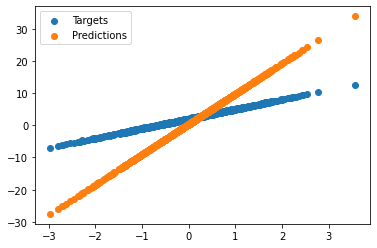

In [40]:
# Before training the model, visualize the loss by plotting the model's prediction

import matplotlib.pyplot as plt

plt.scatter( inputs, targets, label = 'Targets' )
plt.scatter( inputs,  model(inputs), label = 'Predictions' )
plt.legend()

In [41]:
print( loss(model( inputs ), targets) )

tf.Tensor(40.044064, shape=(), dtype=float32)


<h1> Define training loop </h1><br />
With the network and the training data, train the model using gradient desecnt.
Although we can use tf.train.Optimizers for different variants of gradient descent, lets implement from scratch, with the help of GradientTape for automatic differntiation and tf.assign_sub for decrementing the value (which combines tf.assign and tf.sub) 

In [42]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss(model(inputs), targets)
    
    dloss_dW, dloss_db = tape.gradient( current_loss, [model.W, model.b] )

    # w = w - learning_rate * dloss_dw
    model.W.assign_sub( learning_rate * dloss_dW )
    model.b.assign_sub( learning_rate * dloss_db )
    

In [43]:
# Now finally implementing loop for training :D
model = Model()
# collecting w's, b's and loss for plotting
Ws, bs, losses = [], [], []

for epoch in range(10):
    Ws.append( model.W.numpy() )
    bs.append( model.b.numpy() )

    curr_loss = loss(model(inputs), targets)
    losses.append(curr_loss)

    train(model, inputs, targets, learning_rate=0.01)

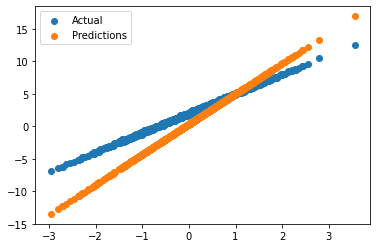

In [44]:
plt.scatter( inputs, targets, label = 'Actual' )
plt.scatter( inputs, (model.W * inputs + model.b), label = 'Predictions' )
plt.legend()
# After ten epochs we are much closer as compared to before training

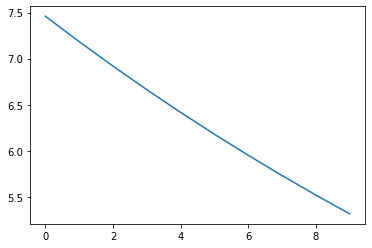

In [45]:
# loss is is decresing continously and it is below 5, after 10 epochs
plt.plot(losses)

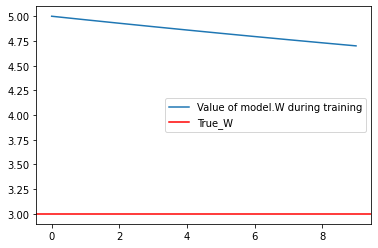

In [48]:
plt.plot( Ws, label = "Value of model.W during training")
plt.axhline(y= TRUE_W, label = 'True_W', c='r')

plt.legend()